#### Computer Vision. Homework 2

# Task 2. Number of objects segmentation

#### by Anastasiia Khaburska

In [1]:
import cv2
import numpy as np
from skimage import io
import matplotlib
from matplotlib import pyplot as plt
from skimage.feature import peak_local_max
from skimage.morphology import watershed
from scipy import ndimage

def path_to_image(im_path):
  return cv2.cvtColor(cv2.imread(im_path), cv2.COLOR_BGR2RGB)

In [2]:
matplotlib.rcParams['figure.figsize'] = (30.0, 20.0)

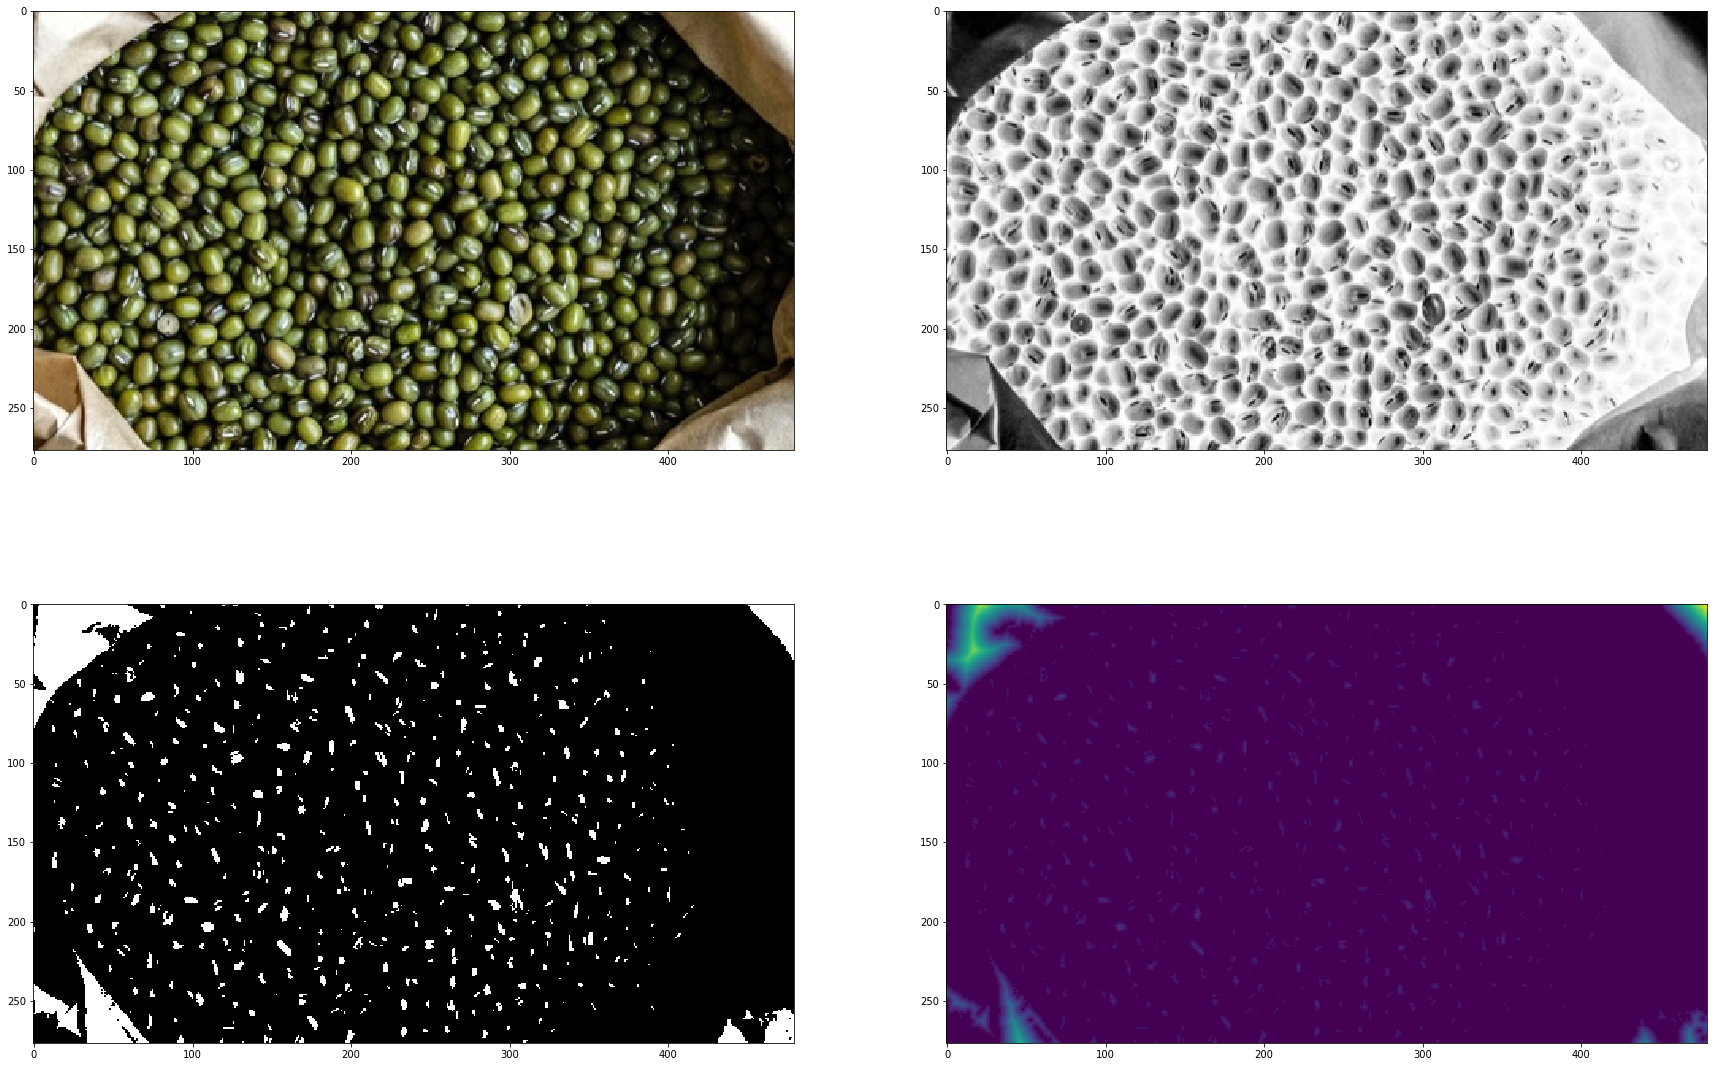

In [3]:
img = path_to_image('./count1.jpg')
#shifted = cv2.pyrMeanShiftFiltering(img, 9, 3)
gray1 = 255-cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((3,3), np.uint8) 
gray1_erode = cv2.erode(gray1, kernel, iterations=1)
gray1_erode =gray1
g1 = cv2.threshold(gray1_erode, 70, 255, cv2.THRESH_BINARY_INV)[1]
thresh=g1.copy()
D = ndimage.distance_transform_edt(thresh)

fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img, "gray")
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(gray1_erode, "gray")
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(g1, "gray")
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(D)

[INFO] 180 unique segments found


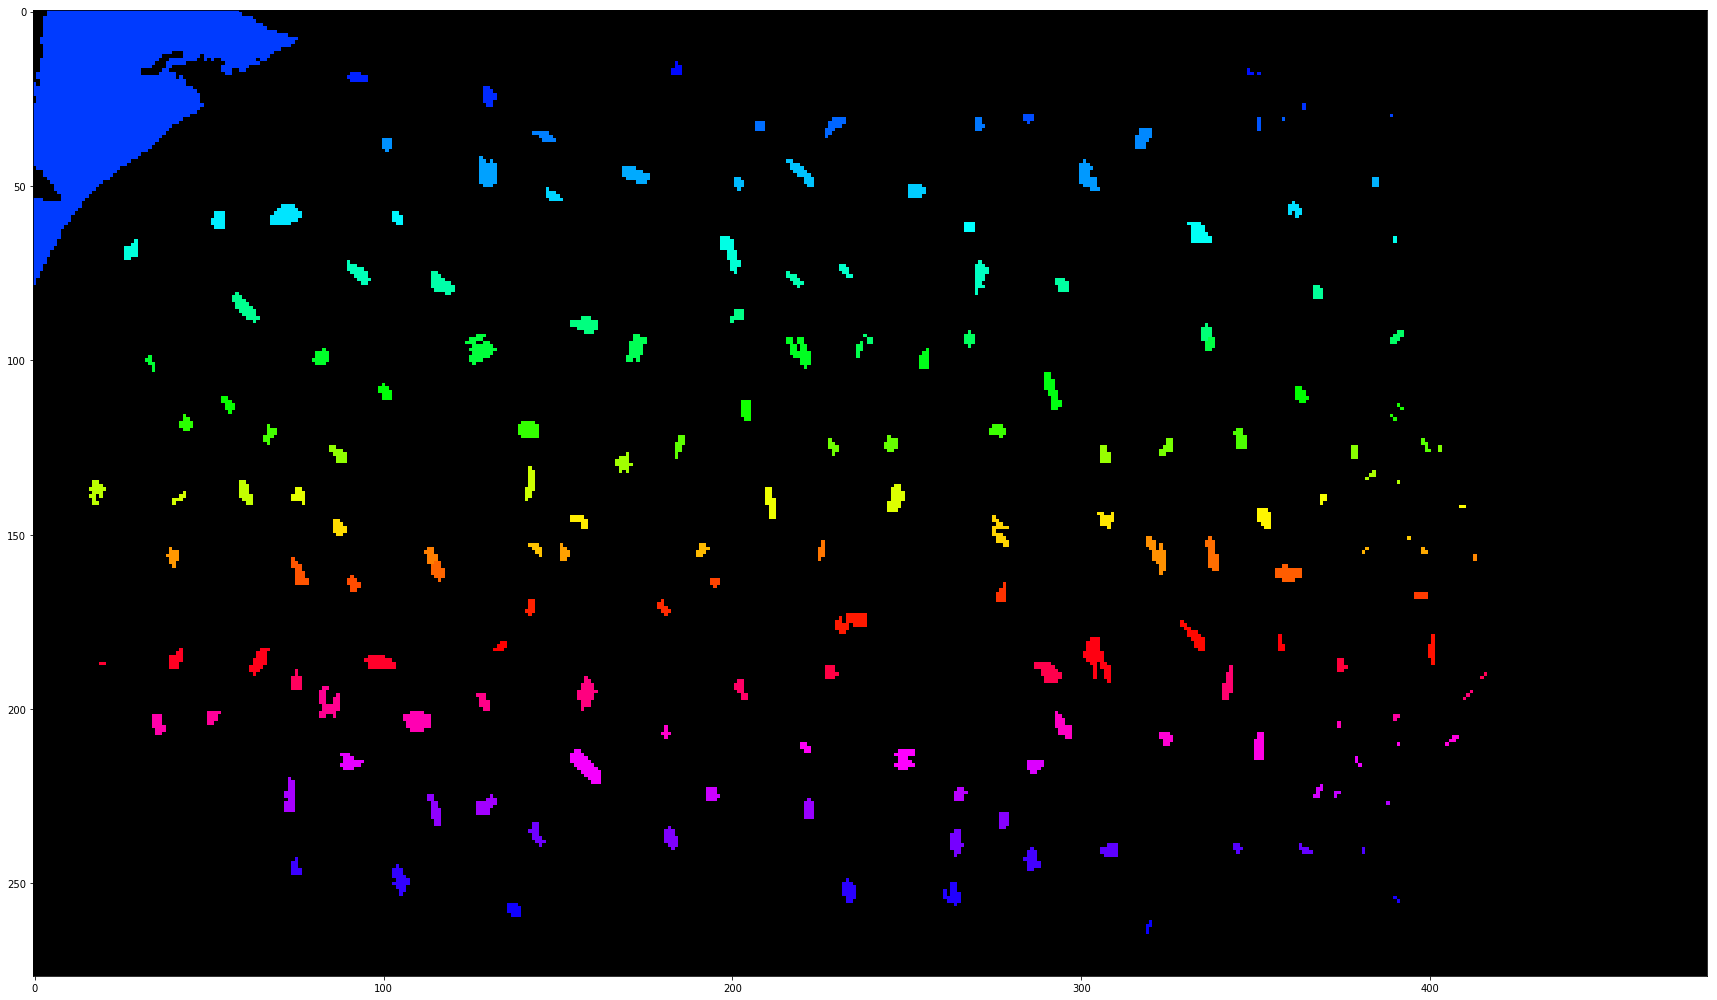

In [4]:
localMax = peak_local_max(D, indices=False, min_distance=15,labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0
plt.imshow(labeled_img)

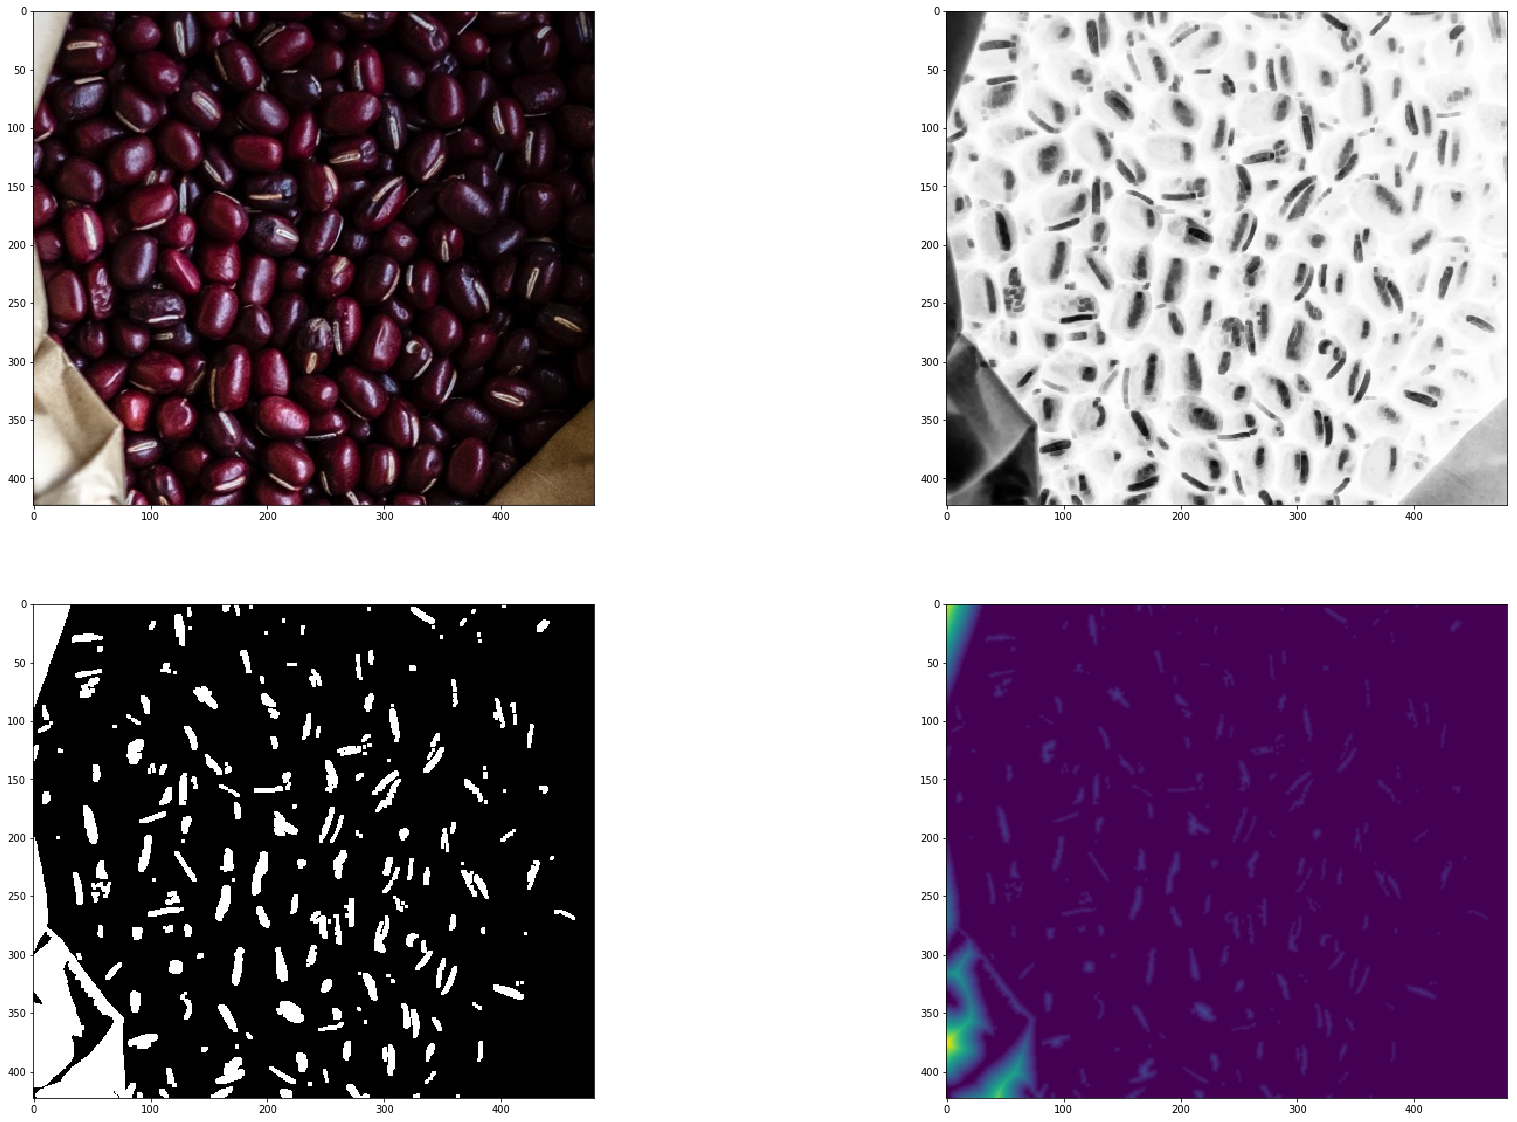

In [5]:
img = path_to_image('./count2.jpg')
#shifted = cv2.pyrMeanShiftFiltering(img, 9, 3)
gray1 = 255-cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((3,3), np.uint8) 
gray1_erode = cv2.erode(gray1, kernel, iterations=1)
#gray1_erode =gray1
g1 = cv2.threshold(gray1_erode, 120, 255, cv2.THRESH_BINARY_INV)[1]
thresh=g1.copy()
D = ndimage.distance_transform_edt(thresh)

fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img, "gray")
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(gray1_erode, "gray")
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(g1, "gray")
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(D)

[INFO] 128 unique segments found


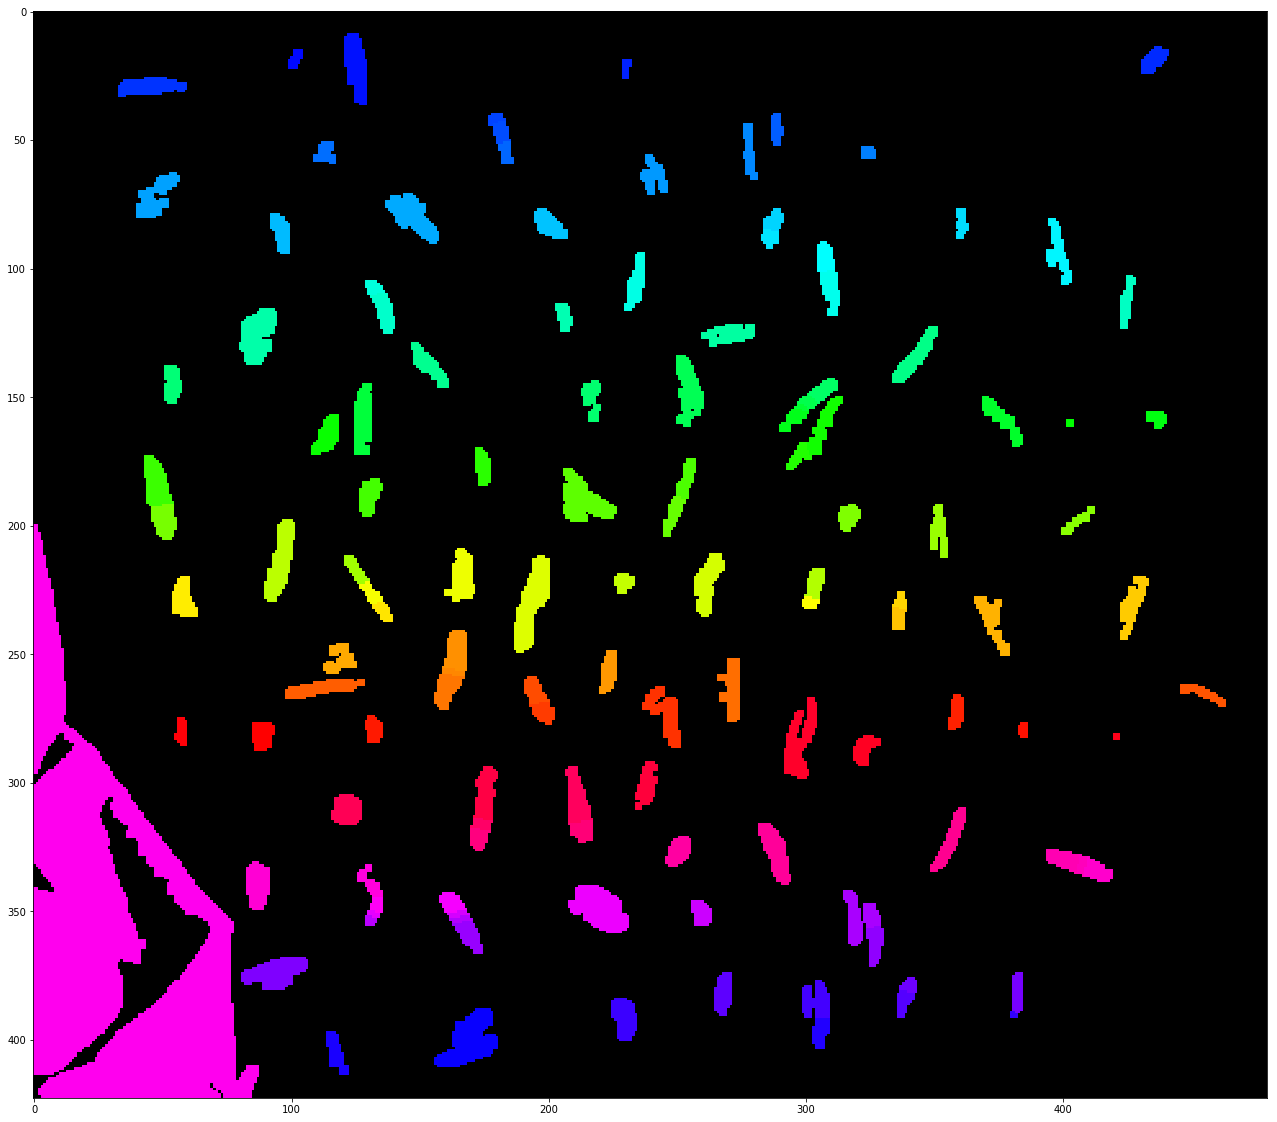

In [6]:
localMax = peak_local_max(D, indices=False, min_distance=20,labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0
plt.imshow(labeled_img)

[INFO] 188 unique segments found


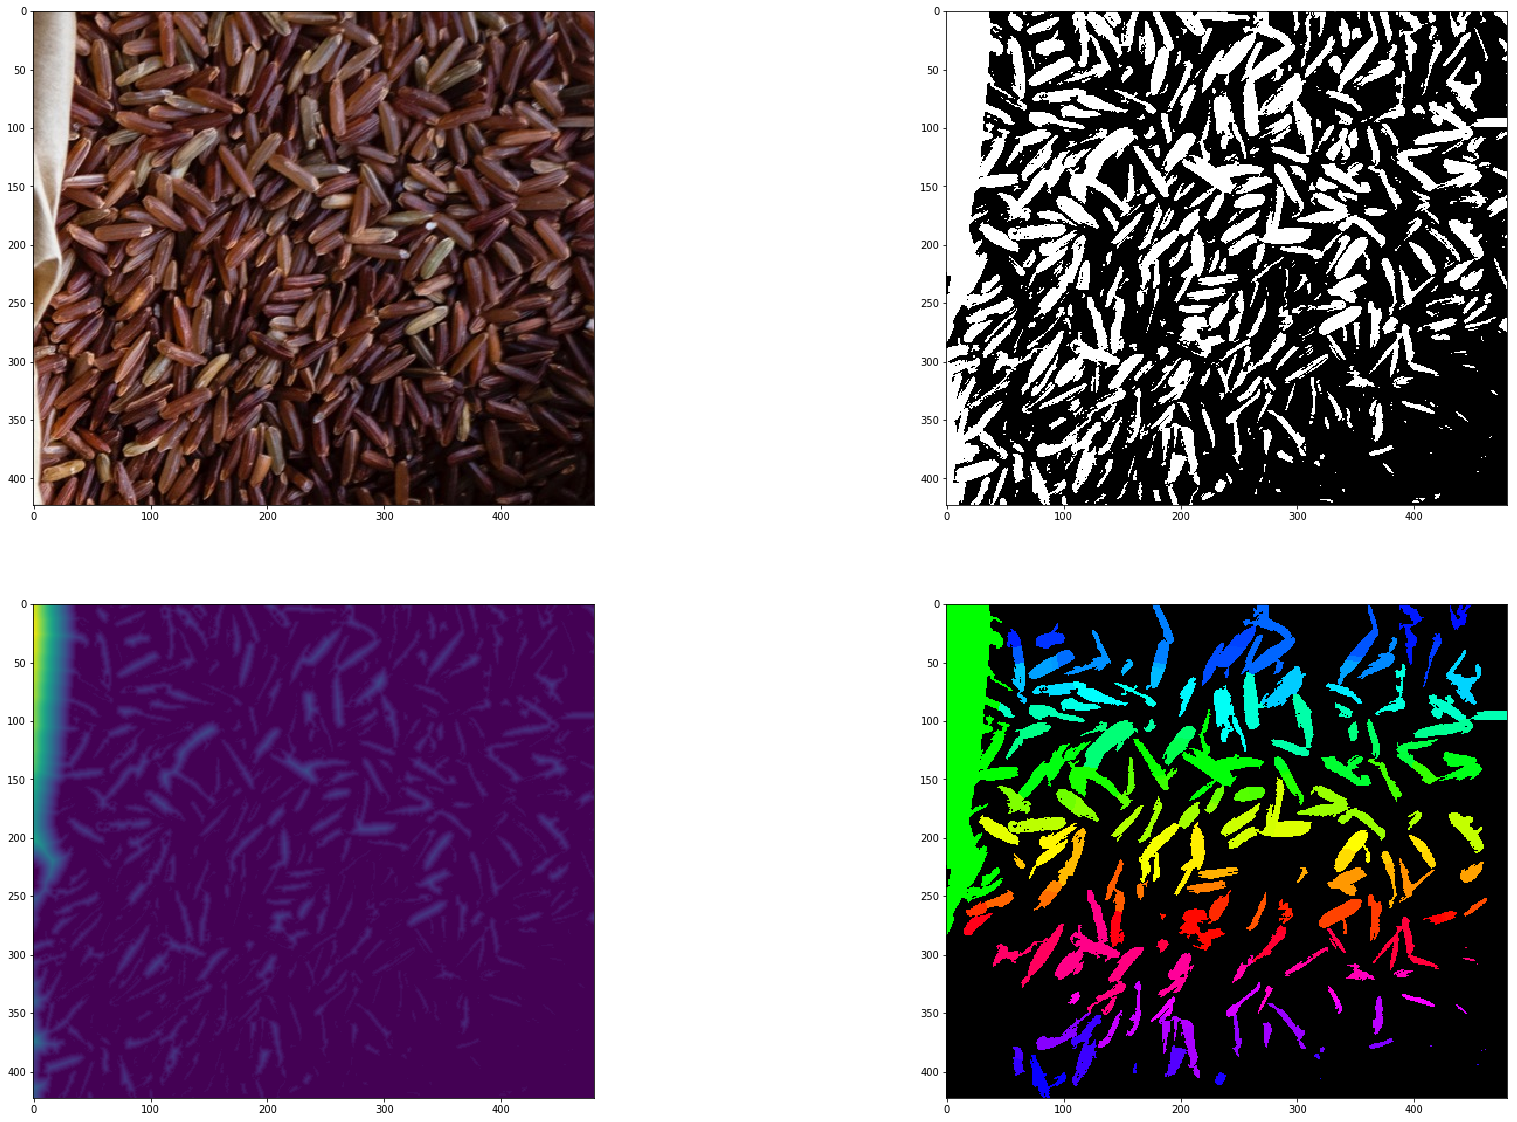

In [7]:
img = path_to_image('./count3.jpg')
#shifted = cv2.pyrMeanShiftFiltering(img, 9, 3)
gray1 = 255-cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5), np.uint8)
g1 = cv2.threshold(gray1, 190, 255, cv2.THRESH_BINARY_INV)[1]
#gray1_erode = cv2.erode(g1, kernel, iterations=1)
#gray1_erode =g1
thresh=g1.copy()
D = ndimage.distance_transform_edt(thresh)

localMax = peak_local_max(D, indices=False, min_distance=15,labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img, "gray")
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(g1, "gray")
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(D)
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(labeled_img)


[INFO] 41 unique segments found


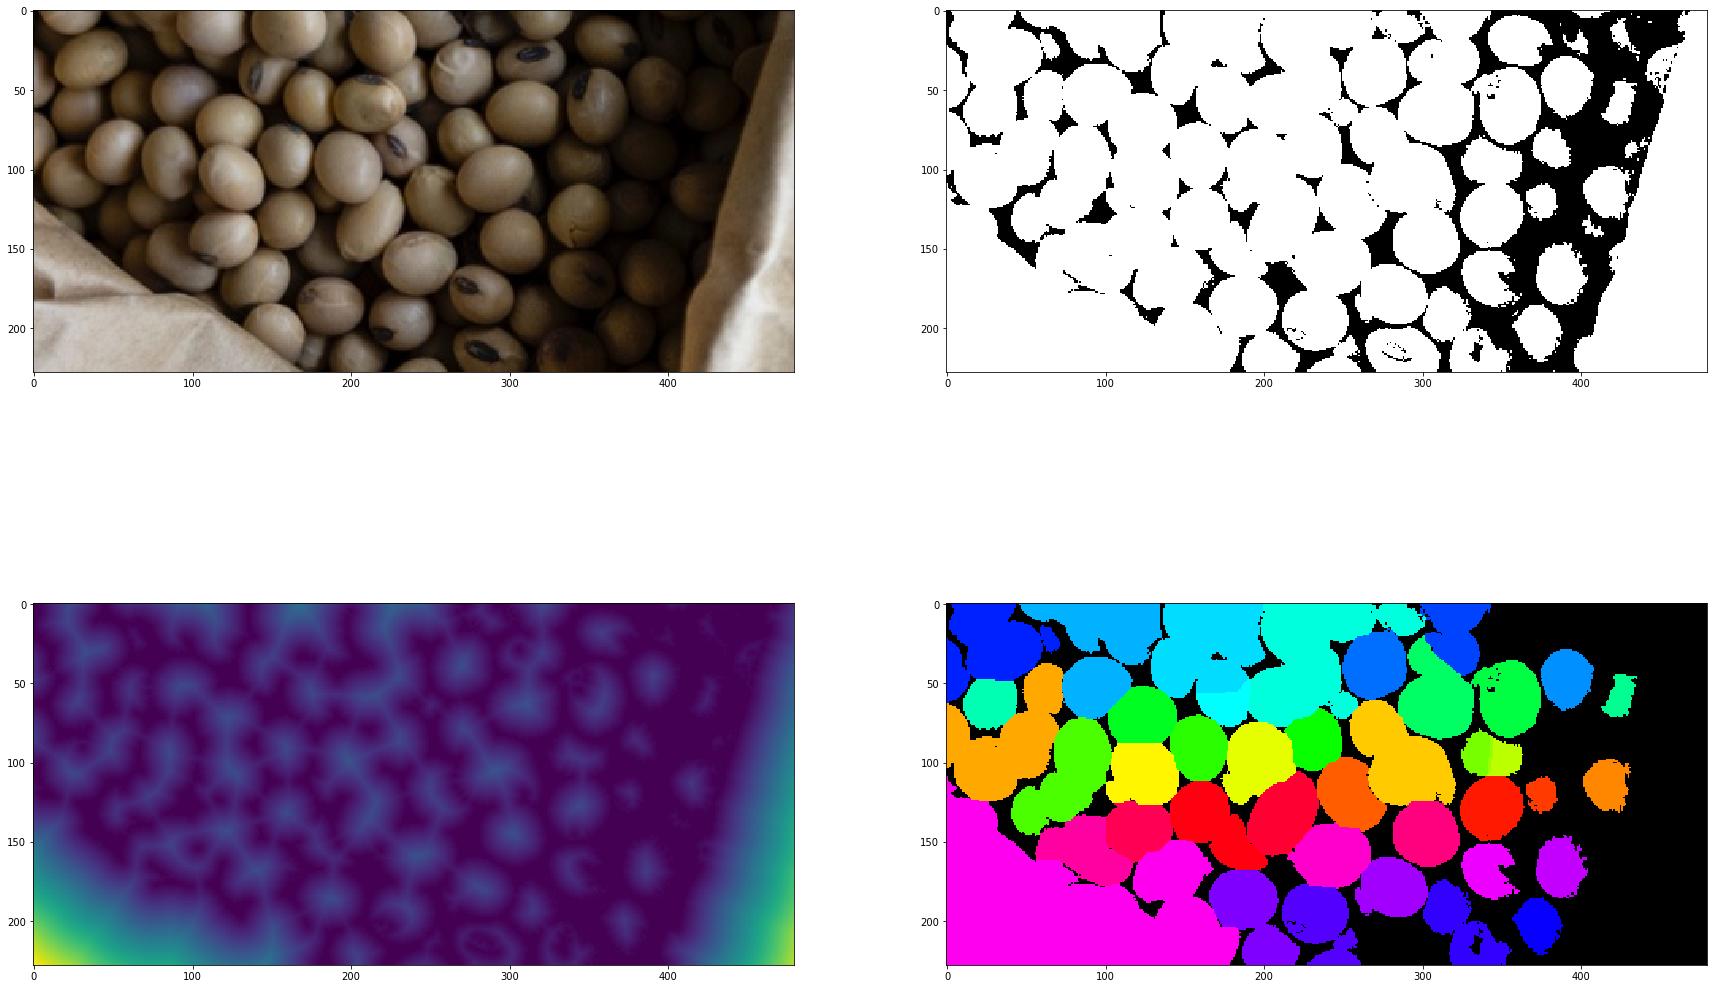

In [8]:
img = path_to_image('./count4.jpg')
#shifted = cv2.pyrMeanShiftFiltering(img, 9, 3)
gray1 = 255-cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5), np.uint8) 
g1 = cv2.threshold(gray1, 240, 255, cv2.THRESH_BINARY_INV)[1]
gray1_erode = cv2.erode(g1, kernel, iterations=1)
thresh=g1.copy()
D = ndimage.distance_transform_edt(thresh)

localMax = peak_local_max(D, indices=False, min_distance=20,labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img, "gray")
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(g1, "gray")
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(D)
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(labeled_img)

[INFO] 2 unique segments found


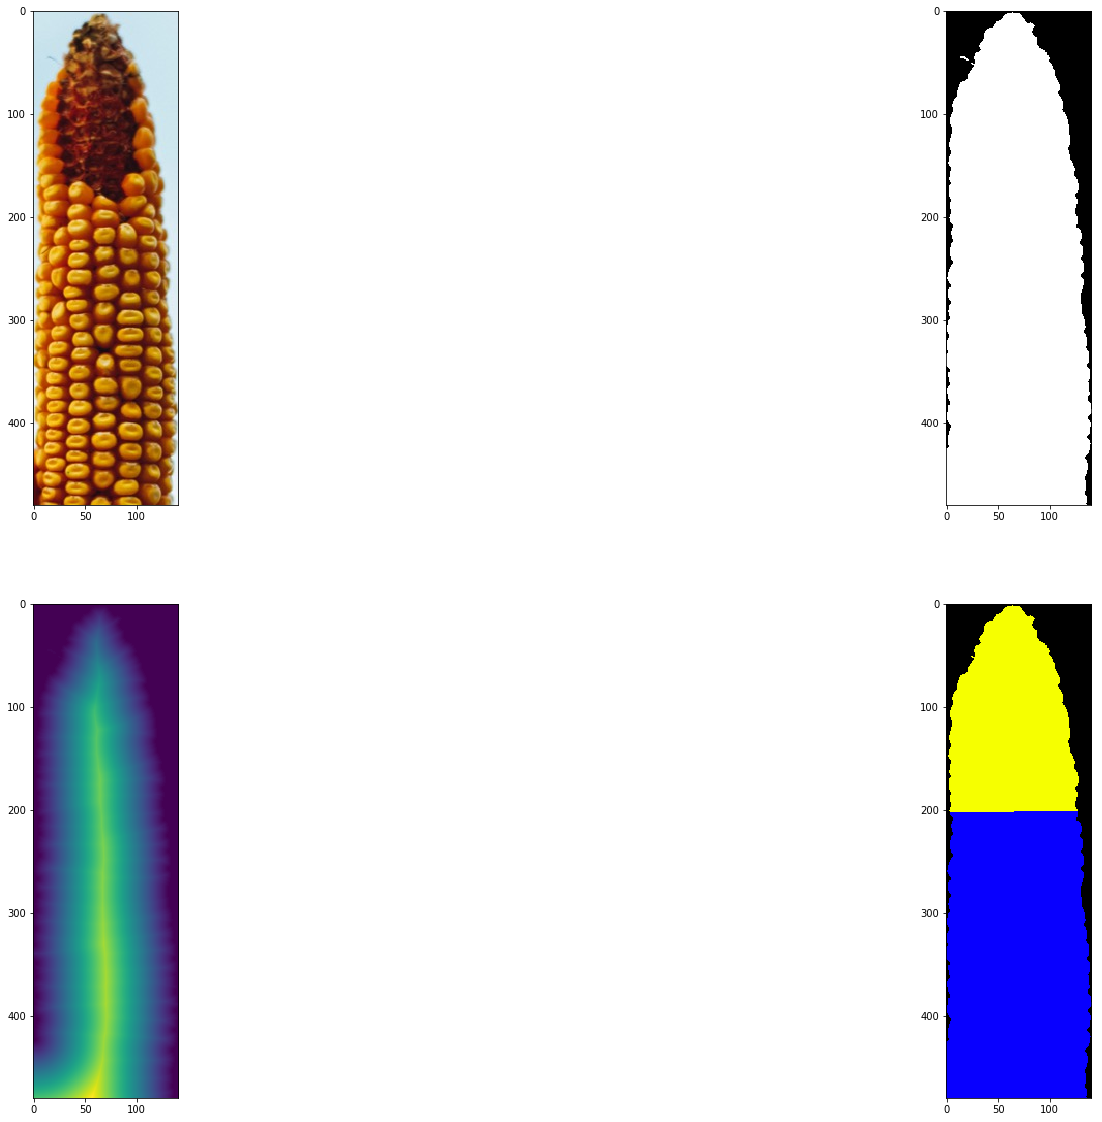

In [9]:
img = path_to_image('./count5.jpg')
#shifted = cv2.pyrMeanShiftFiltering(img, 9, 3)
gray1 = 255-cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5), np.uint8) 
g1 = cv2.threshold(gray1, 40, 255, cv2.THRESH_BINARY)[1]
thresh=g1.copy()
D = ndimage.distance_transform_edt(thresh)

localMax = peak_local_max(D, indices=False, min_distance=30,labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img, "gray")
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(g1, "gray")
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(D)
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(labeled_img)

[INFO] 102 unique segments found


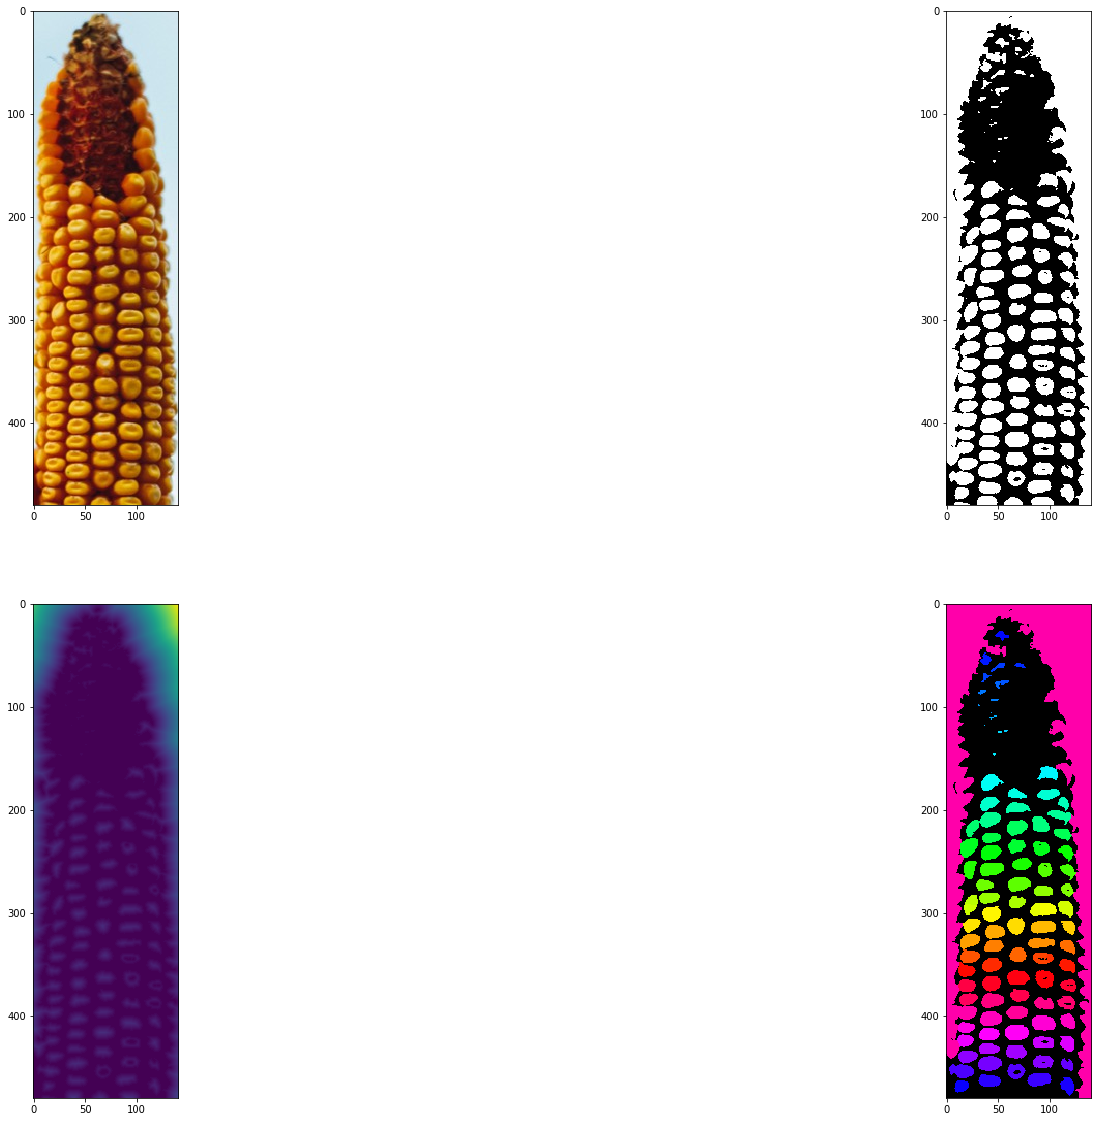

In [10]:
img = path_to_image('./count5.jpg')
gray1 = 255-cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5), np.uint8) 
g1 = cv2.threshold(gray1, 180, 255, cv2.THRESH_BINARY_INV)[1]
#gray1_erode = cv2.erode(g1, kernel, iterations=1)
thresh=g1.copy()
D = ndimage.distance_transform_edt(thresh)

localMax = peak_local_max(D, indices=False, min_distance=10,labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img, "gray")
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(g1, "gray")
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(D)
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(labeled_img)

[INFO] 573 unique segments found


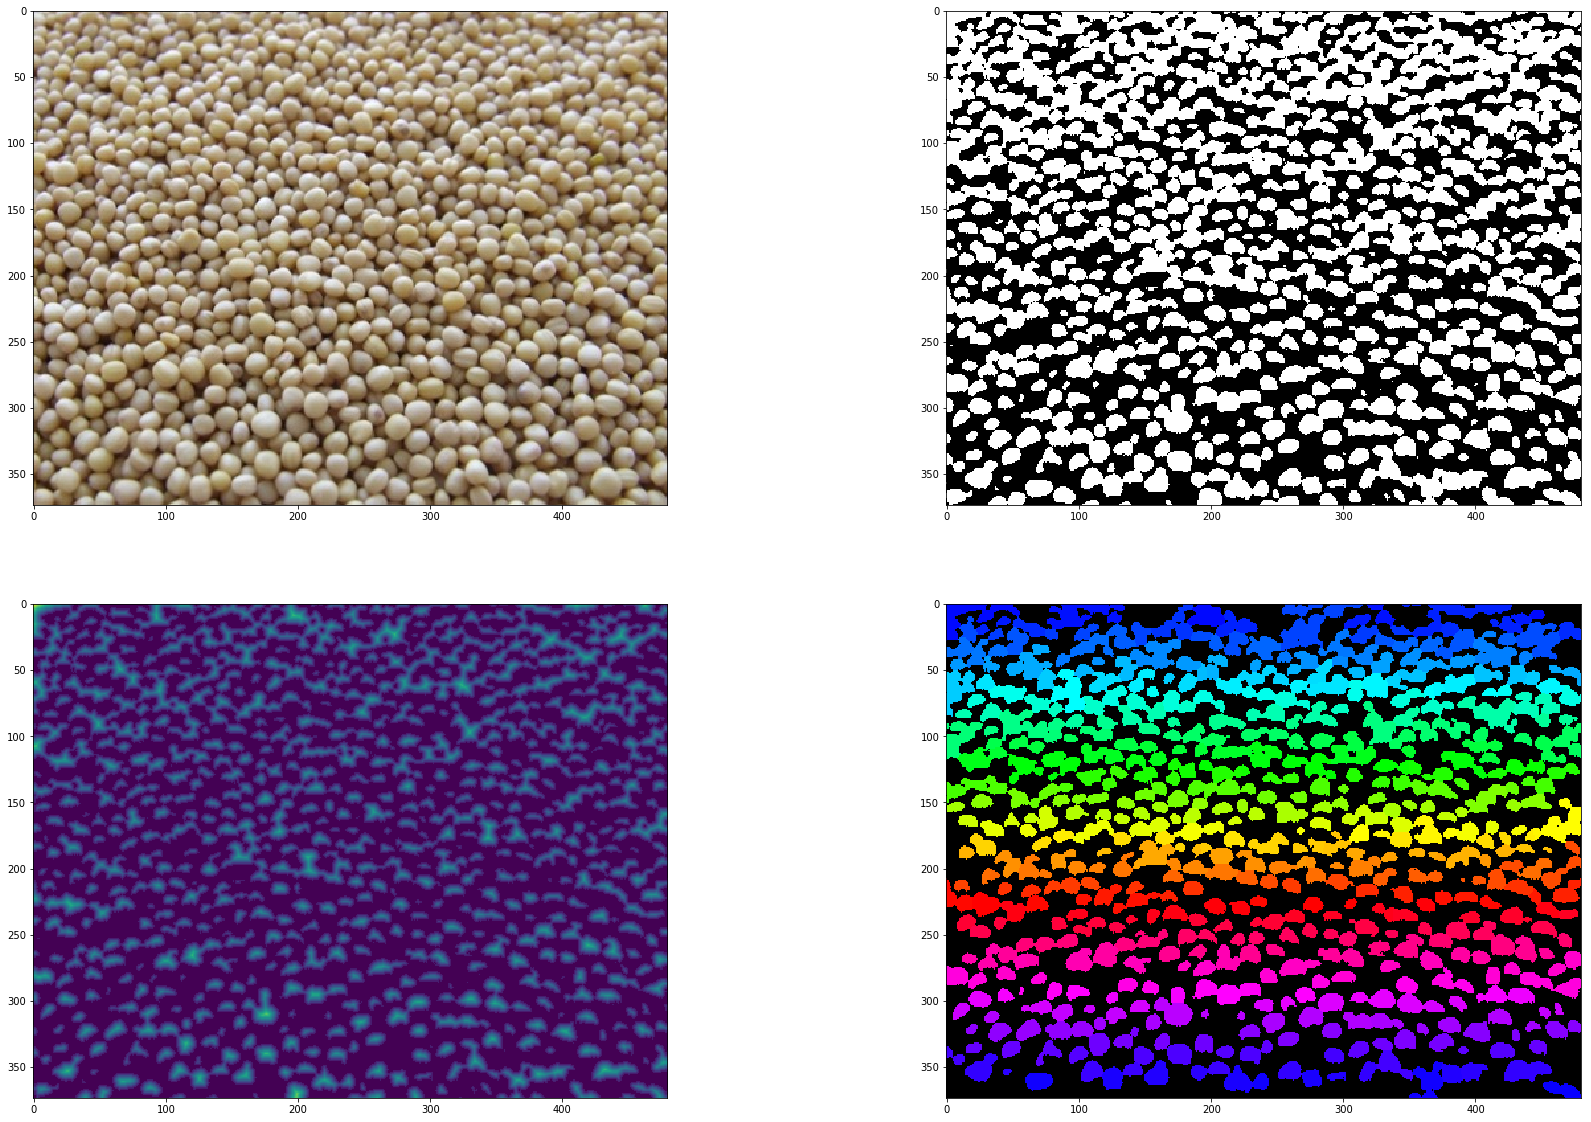

In [11]:
img = path_to_image('./count6.jpg')
gray1 = 255-cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((3,3), np.uint8) 
g1 = cv2.threshold(gray1, 120, 255, cv2.THRESH_BINARY_INV)[1]
#gray1_erode = cv2.erode(g1, kernel, iterations=1)
thresh=g1.copy()
D = ndimage.distance_transform_edt(thresh)

localMax = peak_local_max(D, indices=False, min_distance=8,labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img, "gray")
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(g1, "gray")
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(D)
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(labeled_img)

[INFO] 75 unique segments found


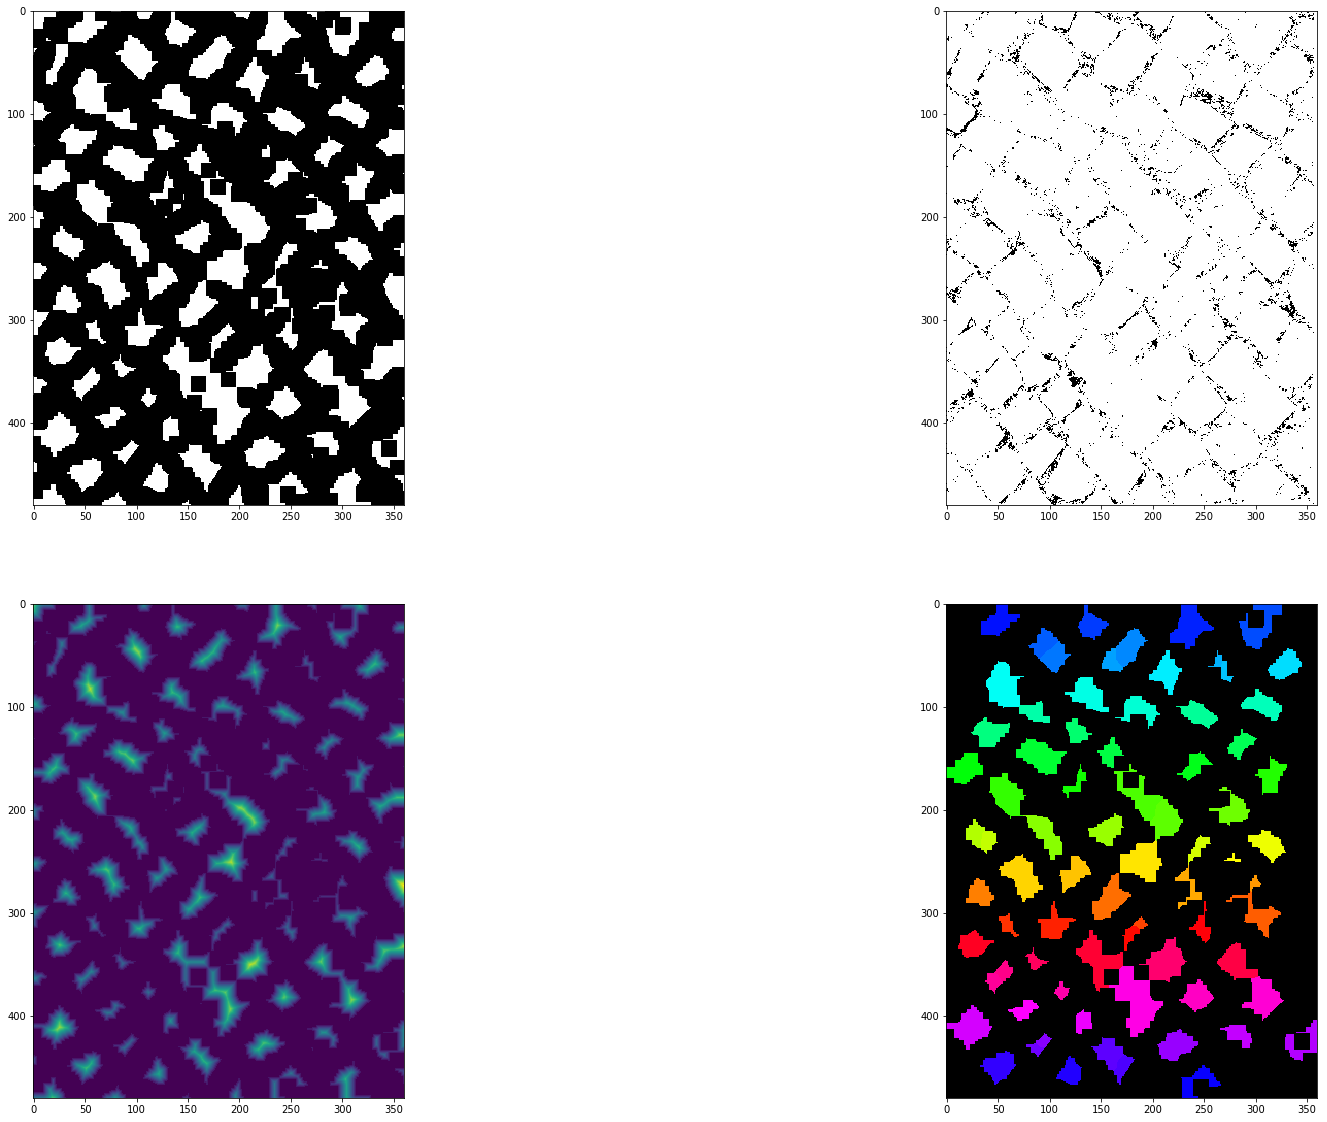

In [12]:
img = path_to_image('./count7.jpg')
shifted = cv2.pyrMeanShiftFiltering(img, 35, 25)
gray1 = 255-cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY) 
g1 = cv2.threshold(gray1, 200, 255, cv2.THRESH_BINARY_INV)[1]
kernel = np.ones((5,5), np.uint8)
gray1_erode = cv2.erode(g1, kernel, iterations=2)
kernel = np.ones((3,3), np.uint8)
gray1_erode = cv2.erode(gray1_erode, kernel, iterations=3)

thresh=gray1_erode.copy()
D = ndimage.distance_transform_edt(thresh)

localMax = peak_local_max(D, indices=False, min_distance=20,labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(gray1_erode, "gray")
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(g1, "gray")
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(D)
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(labeled_img)

[INFO] 70 unique segments found


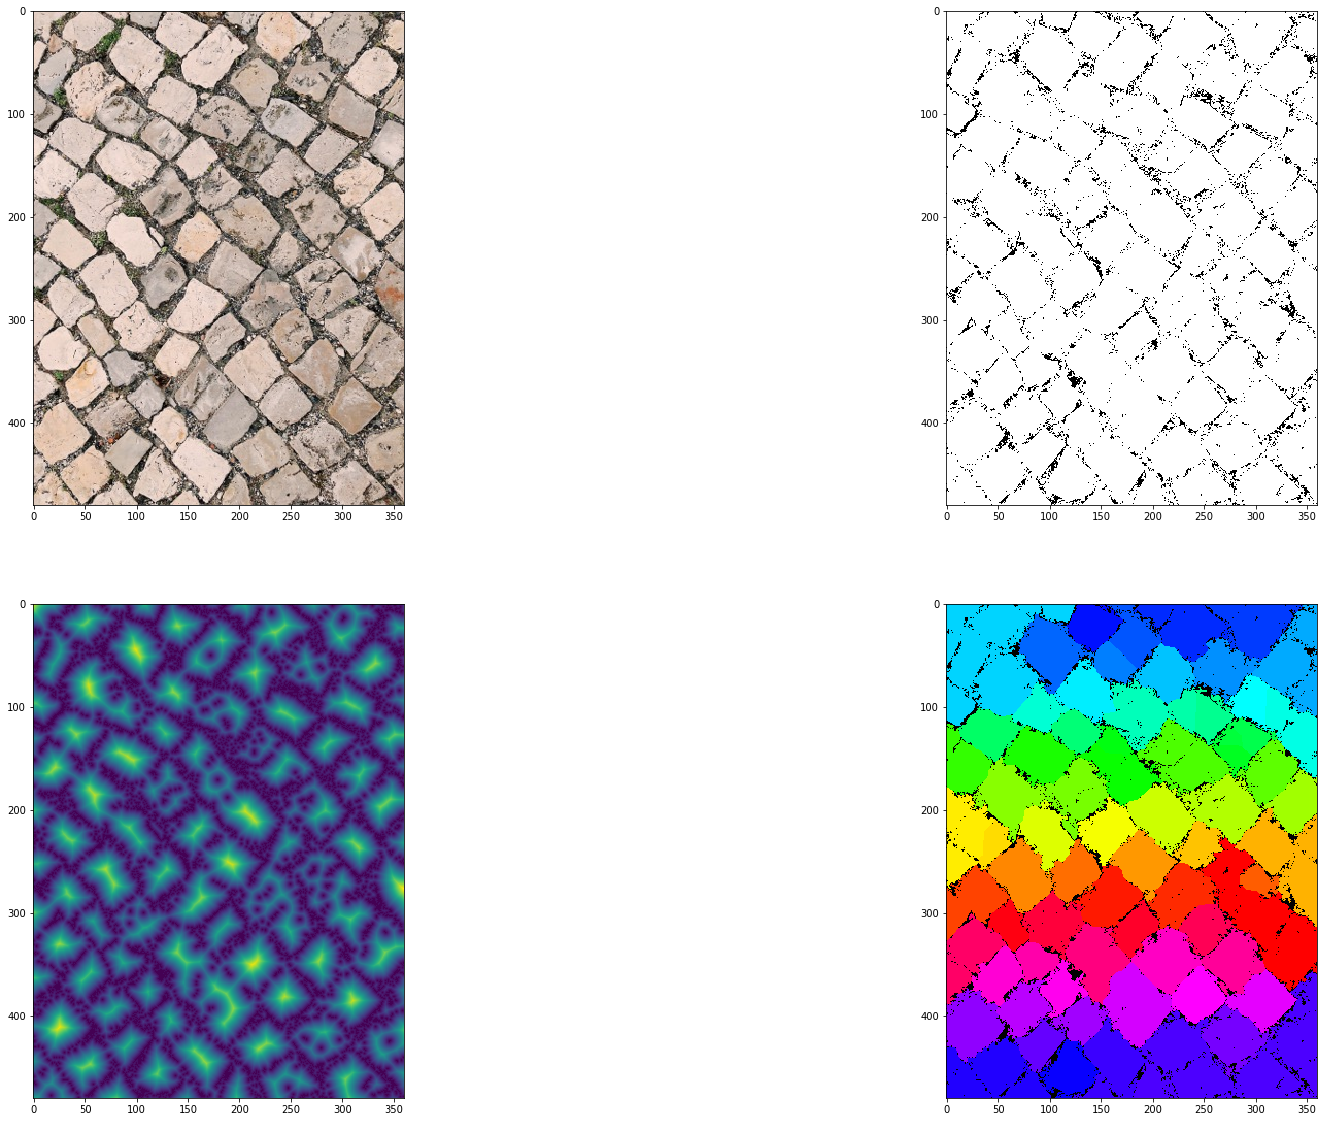

In [13]:
img = path_to_image('./count7.jpg')
#shifted = cv2.pyrMeanShiftFiltering(img, 35, 25)
gray1 = 255-cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
g1 = cv2.threshold(gray1, 200, 255, cv2.THRESH_BINARY_INV)[1]
thresh=g1.copy()
D = ndimage.distance_transform_edt(thresh)

localMax = peak_local_max(D, indices=False, min_distance=20,labels=thresh)
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img, "gray")
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(g1, "gray")
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(D)
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(labeled_img)

[INFO] 98 unique segments found


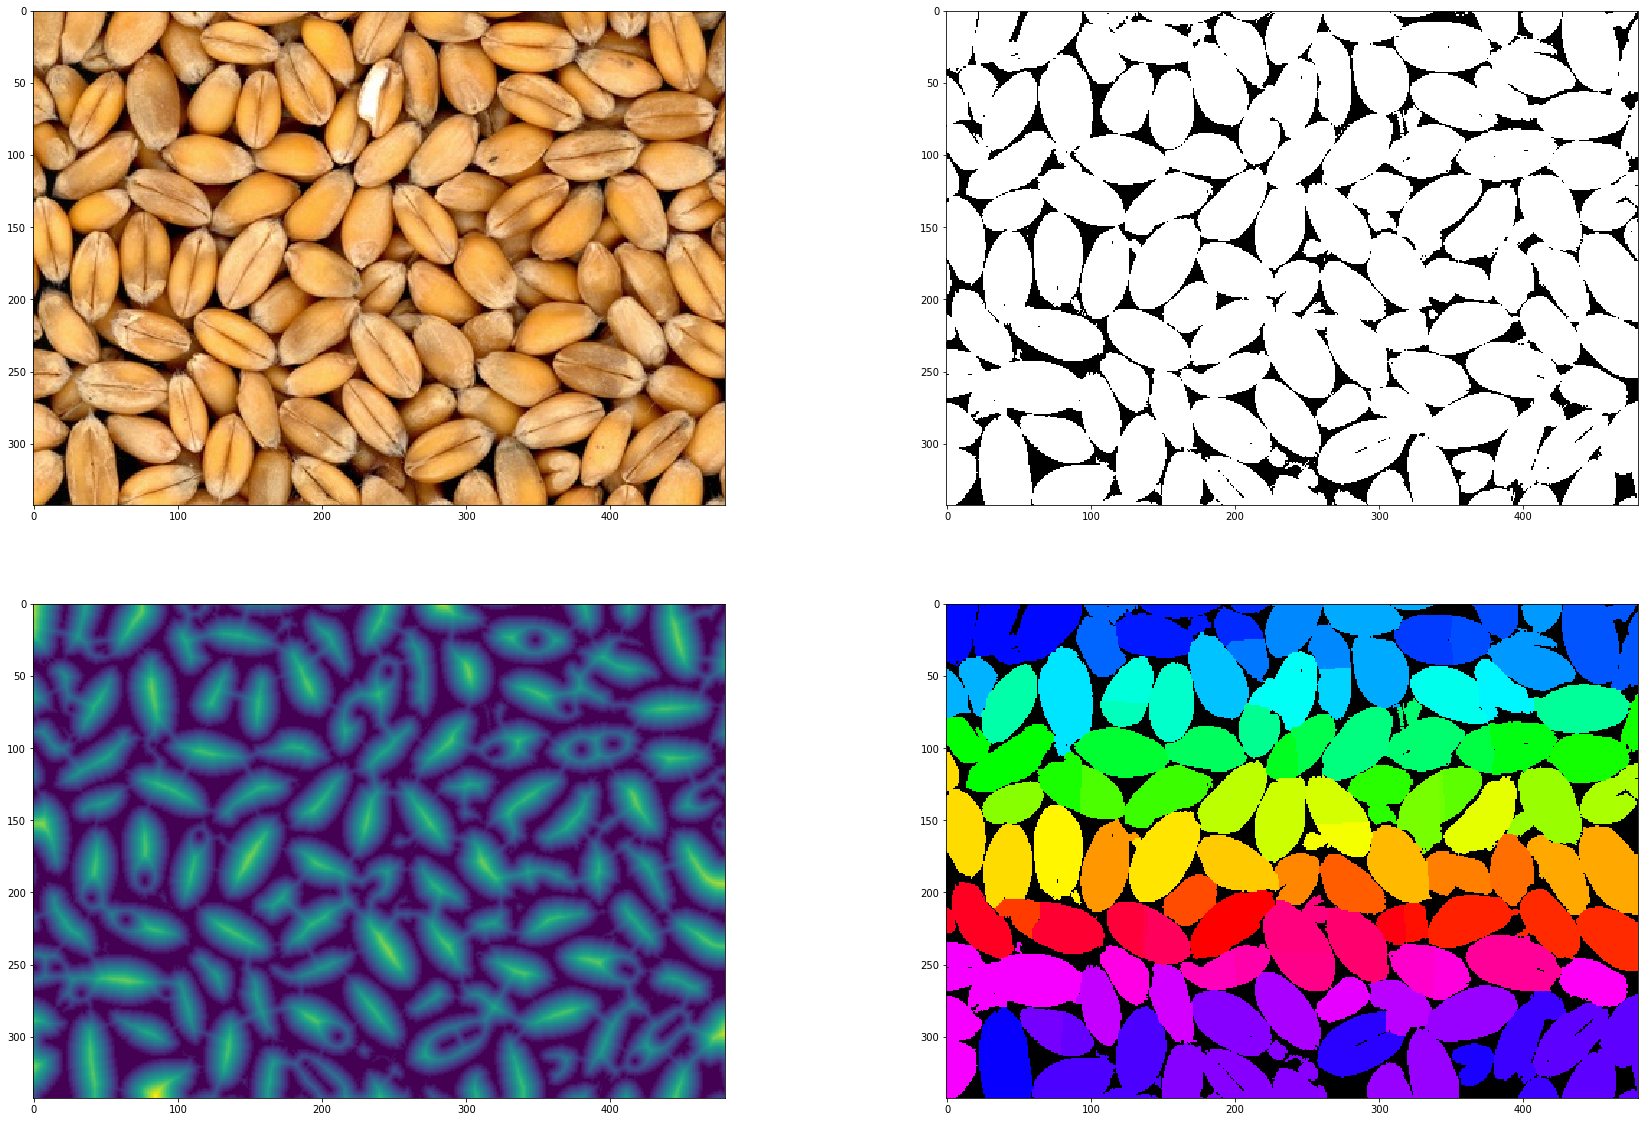

In [14]:
img = path_to_image('./count8.jpg')
#shifted = cv2.pyrMeanShiftFiltering(img, 9, 3)
gray1 = 255-cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5), np.uint8)
g1 = cv2.threshold(gray1, 190, 255, cv2.THRESH_BINARY_INV)[1]
thresh=g1.copy()
D = ndimage.distance_transform_edt(thresh)

localMax = peak_local_max(D, indices=False, min_distance=16,labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img, "gray")
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(g1, "gray")
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(D)
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(labeled_img)


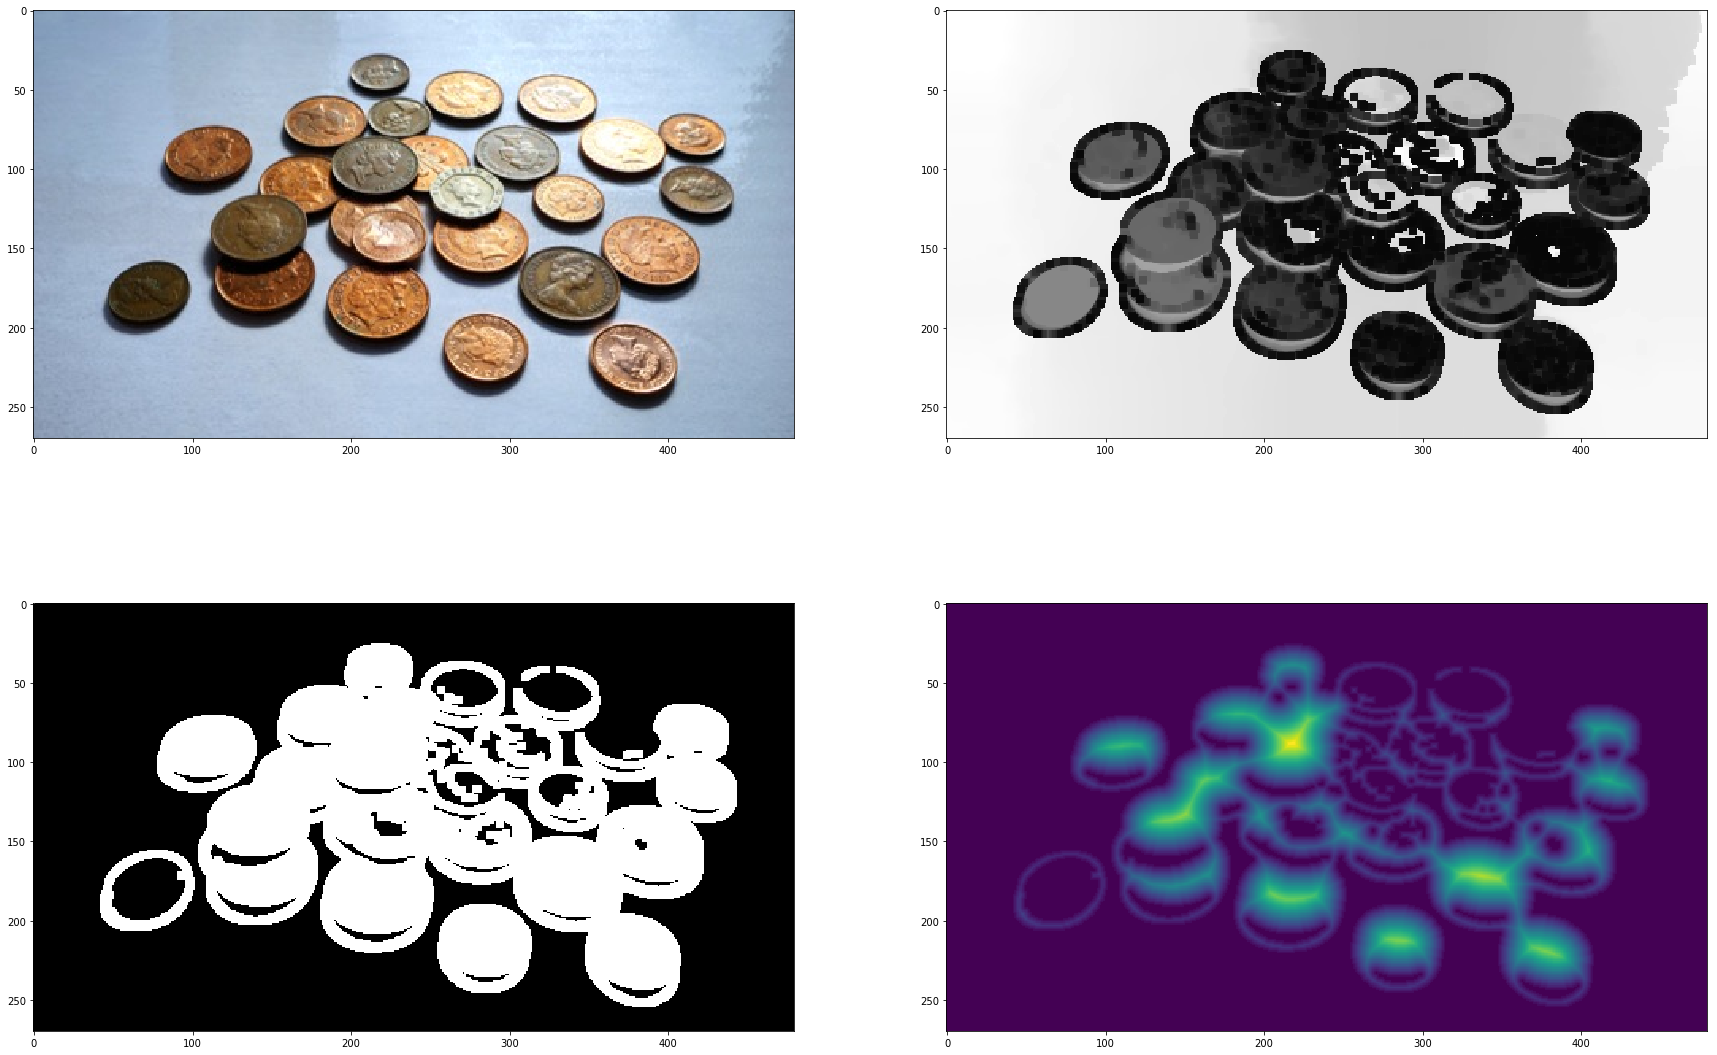

In [15]:
img = path_to_image('./count9.jpg')
shifted = cv2.pyrMeanShiftFiltering(img, 35, 25)
gray1 = 255-90-cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
kernel = np.ones((3,3), np.uint8) 
gray1_erode = 7+cv2.erode(gray1, kernel, iterations=2)
g1 = cv2.threshold(gray1_erode, 125, 255, cv2.THRESH_BINARY_INV)[1]
thresh=g1.copy()
D = ndimage.distance_transform_edt(thresh)

fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img, "gray")
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(gray1_erode, "gray")
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(g1, "gray")
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(D)

[INFO] 24 unique segments found


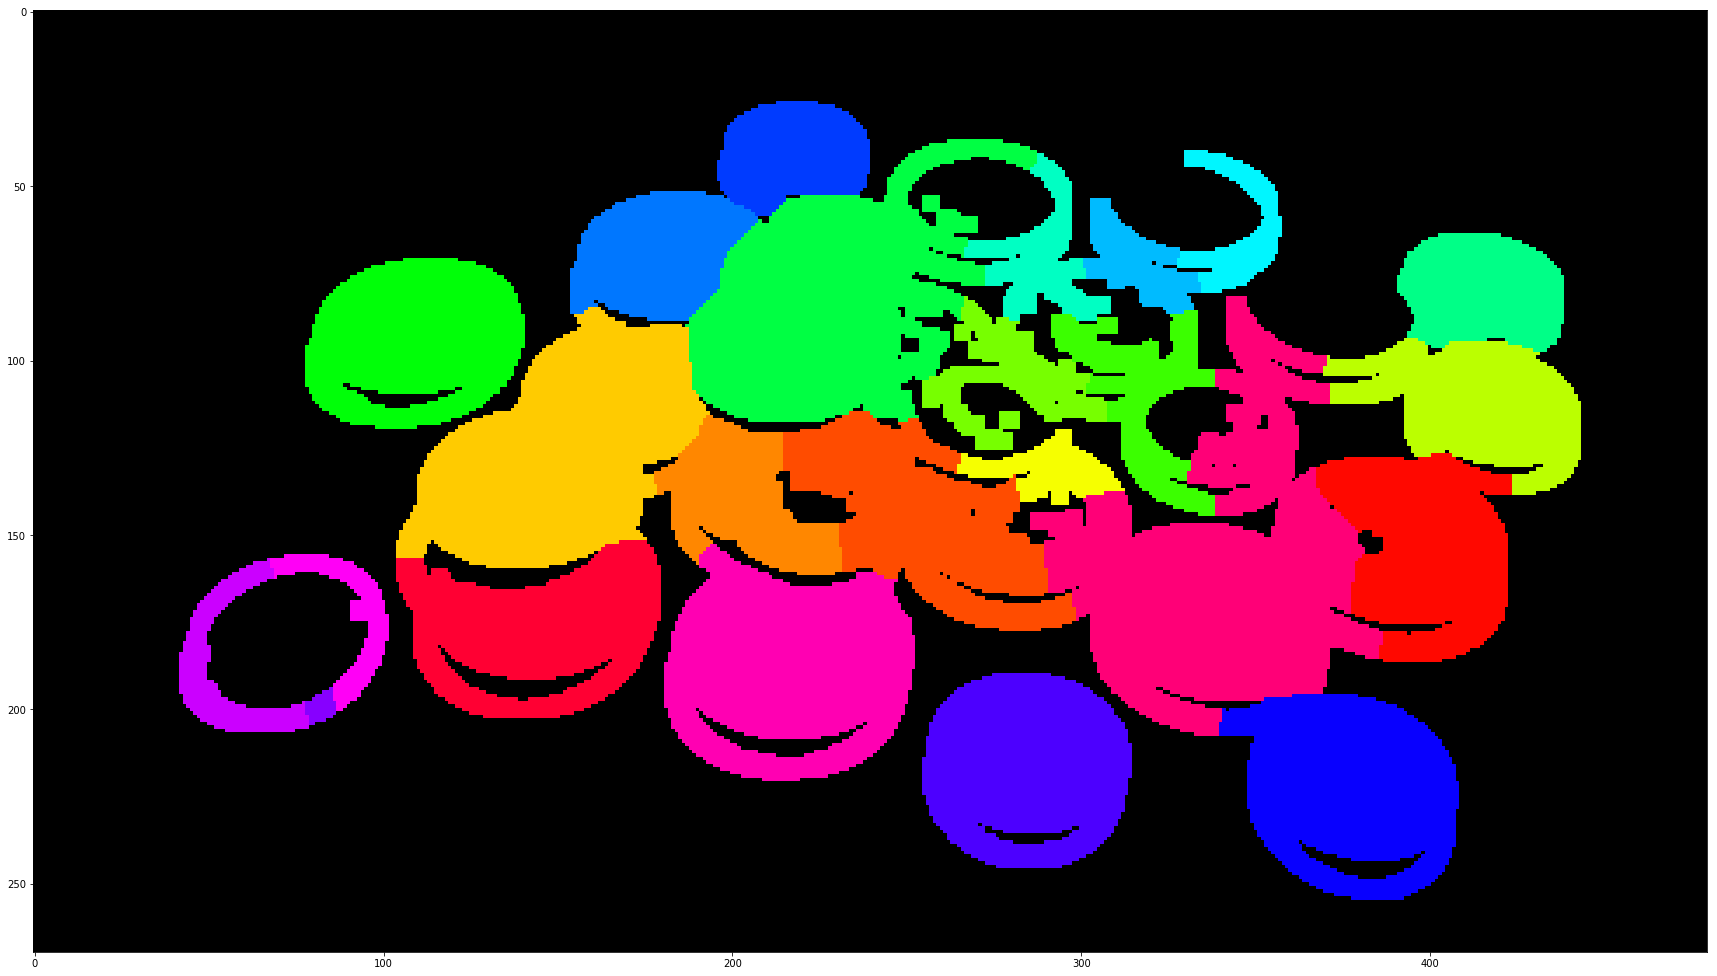

In [16]:
localMax = peak_local_max(D, indices=False, min_distance=20,labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0
plt.imshow(labeled_img)

[INFO] 26 unique segments found


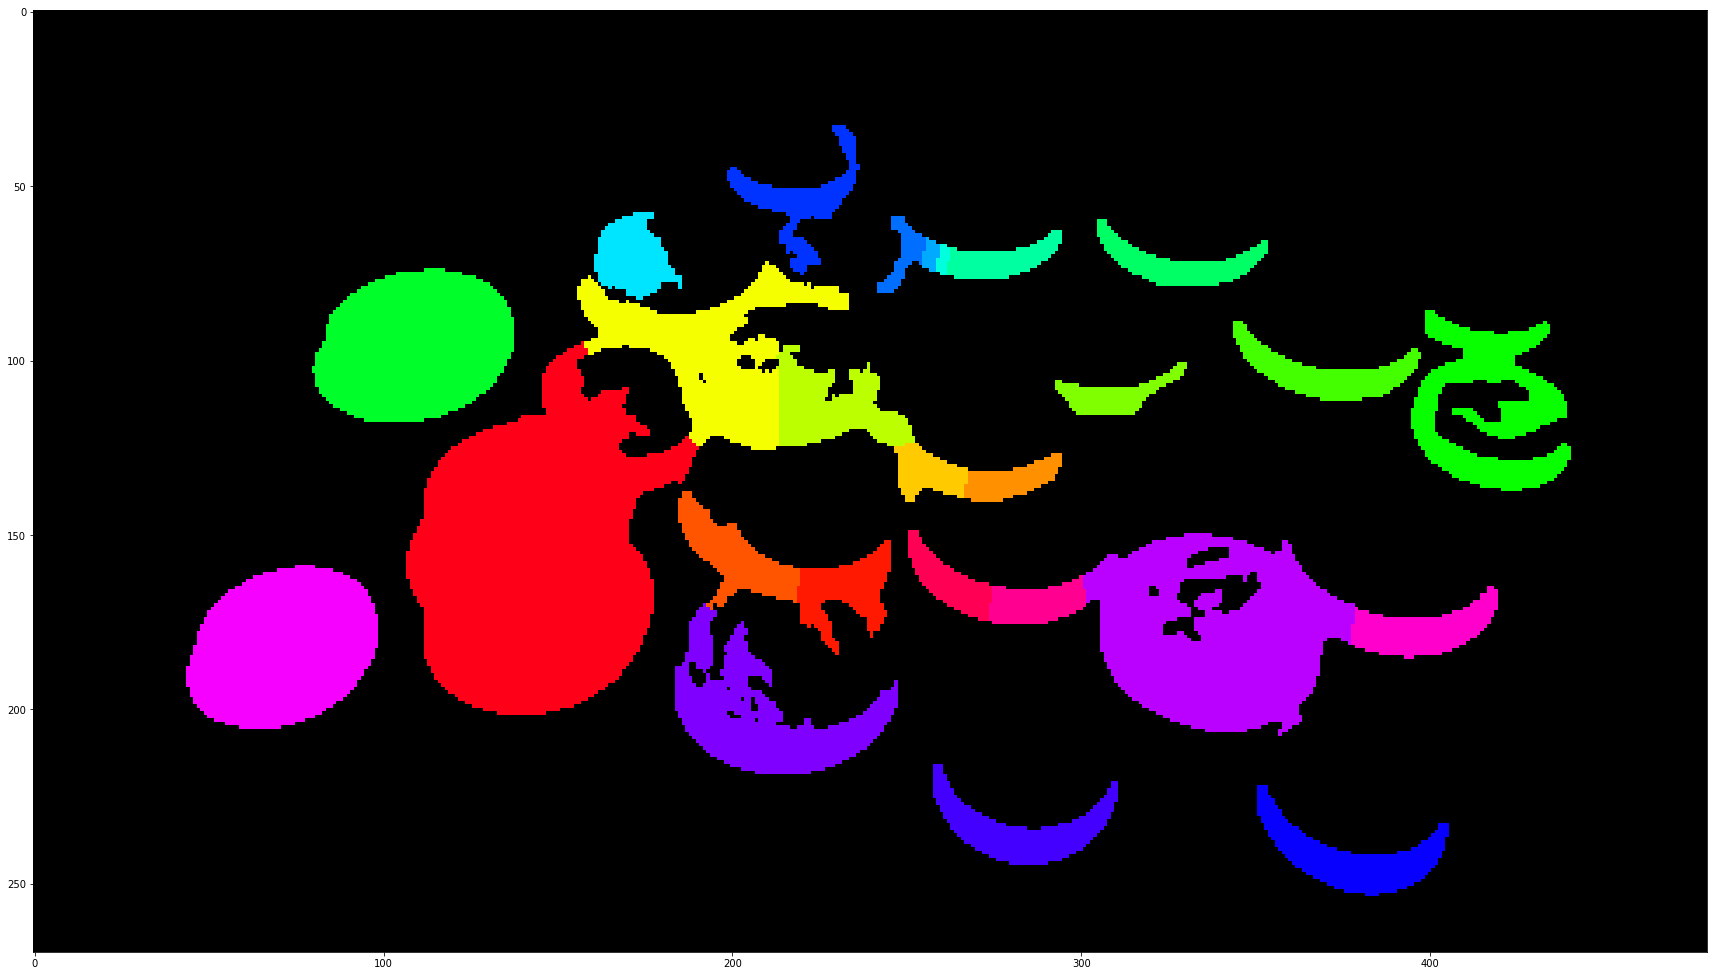

In [17]:
img = cv2.imread('count9.jpg')
img = cv2.medianBlur(img, 5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, imgt = cv2.threshold(img, 125, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
imgt = cv2.morphologyEx(imgt, cv2.MORPH_OPEN, (5, 5))
img2 = imgt.copy()
c, h = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

D = ndimage.distance_transform_edt(imgt)
localMax = peak_local_max(D, indices=False, min_distance=20,labels=imgt)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=imgt)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))

label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])

# cvt to BGR for display
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)

# set bg label to black
labeled_img[label_hue==0] = 0

#cv2_imshow(img)
plt.imshow(labeled_img)
#plt.imshow(imgt, 'gray')

[INFO] 10 unique segments found


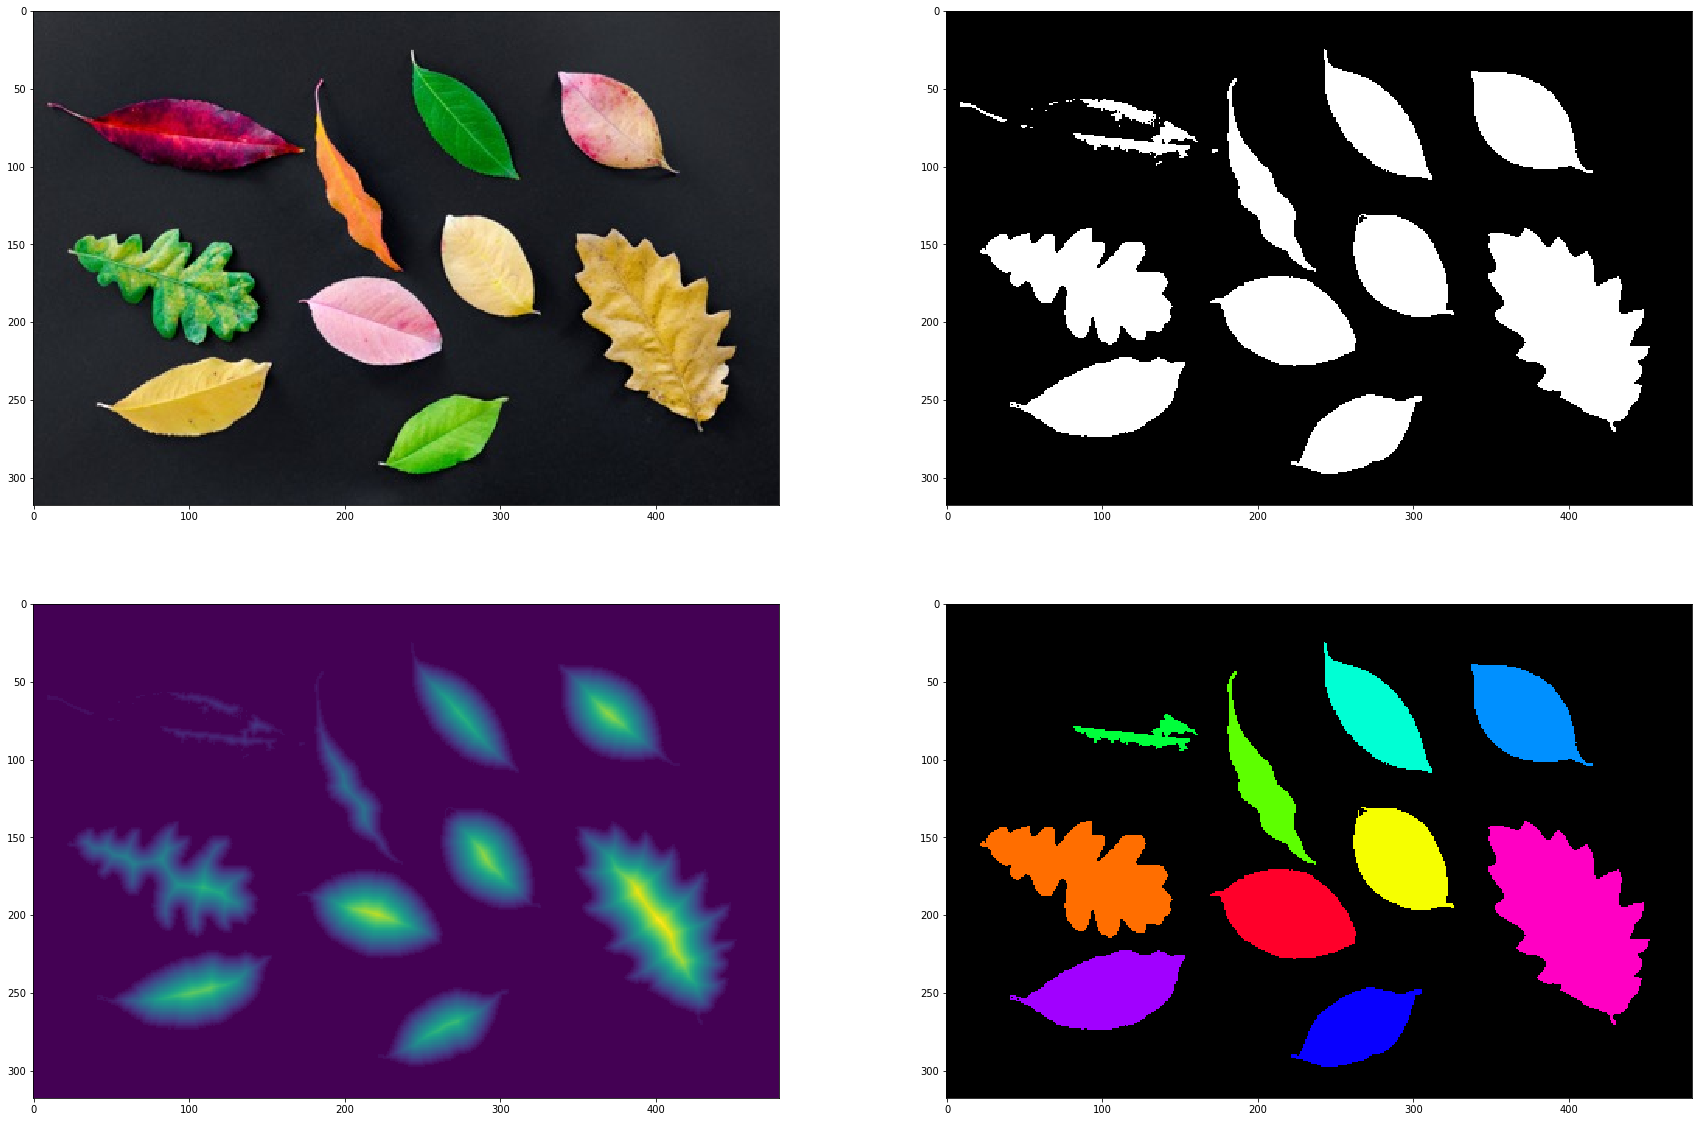

In [18]:
img = path_to_image('./count10.jpg')
shifted = cv2.pyrMeanShiftFiltering(img, 35, 15)
gray1 = 240-cv2.cvtColor(shifted, cv2.COLOR_BGR2GRAY)
kernel = np.ones((5,5), np.uint8)
g1 = cv2.threshold(gray1, 190, 255, cv2.THRESH_BINARY_INV)[1]
thresh=g1.copy()
D = ndimage.distance_transform_edt(thresh)

localMax = peak_local_max(D, indices=False, min_distance=40,labels=thresh)
 
# perform a connected component analysis on the local peaks,
# using 8-connectivity, then appy the Watershed algorithm
markers = ndimage.label(localMax, structure=np.ones((3, 3)))[0]
labels = watershed(-D, markers, mask=thresh)
print("[INFO] {} unique segments found".format(len(np.unique(labels)) - 1))
label_hue = np.uint8(179*labels/np.max(labels))
blank_ch = 255*np.ones_like(label_hue)
labeled_img = cv2.merge([label_hue, blank_ch, blank_ch])
labeled_img = cv2.cvtColor(labeled_img, cv2.COLOR_HSV2BGR)
labeled_img[label_hue==0] = 0

fig = plt.figure()
a = fig.add_subplot(2, 2, 1)
imgplot = plt.imshow(img, "gray")
a = fig.add_subplot(2, 2, 2)
imgplot = plt.imshow(g1, "gray")
a = fig.add_subplot(2, 2, 3)
imgplot = plt.imshow(D)
a = fig.add_subplot(2, 2, 4)
imgplot = plt.imshow(labeled_img)
